In [42]:
import os
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import DataFrameMaker
from mu2e.mu2eplots import mu2e_plot, mu2e_plot3d
from matplotlib import gridspec
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
import pandas as pd
from time import sleep
import plotly.io as pio
from plotly.offline import init_notebook_mode
from skhep.visual import MplPlotter as splt
from copy import deepcopy
from lmfit import Model, Parameters, report_fit
from hallprobesim_redux import *
from tqdm import tnrange, tqdm_notebook
import pandas as pd
import seaborn as sns

In [2]:
df_long_250mm = DataFrameMaker(mu2e_ext_path+'datafiles/FieldMapsCole/bfield_map_r250mm_p10cm_lengthx10_1232173pts_09-07_160736',input_type = 'pkl').data_frame
df_short_250mm = DataFrameMaker(mu2e_ext_path+'datafiles/FieldMapsCole/bfield_map_1232173pts_08-10_094943',input_type = 'pkl').data_frame


/usr/local/lib/python3.6/site-packages/_pytest/fixtures.py:842: DeprecationWarning:

The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.

/usr/local/lib/python3.6/site-packages/_pytest/fixtures.py:844: DeprecationWarning:

The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.



In [ ]:
phi=3*np.pi/4
fig = mu2e_plot3d(df_short_250mm, 'R', 'Z', 'Bphi', f'R<0.15 and Phi=={phi} and -2<Z<2',
            title_simp = 'Btheta, Solenoid B', df_fit=False, mode='plotly_nb', ptype='3d', units='m', aspect='rect2',)
pio.write_image(fig, '/Users/brianpollack/Documents/Notes_Papers/Helix/figs/fig_bt_B.png')

In [ ]:
#ff_list = []
cfg_params_Cole = cfg_params(ns=1, ms=2, cns=0, cms=0, nms=0, Reff=0.1,
                             n_scale=1, m_scale=1, func_version=120)

cfg_pickle_Cole = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='phi_test', save_name='phi_test', recreate=False)

#for phi in tqdm_notebook((0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2, 5*np.pi/8, 3*np.pi/4, 7*np.pi/8), desc='phi'):
#for phi in tqdm_notebook((0,), desc='phi'):

hmd, ff = field_map_analysis('halltoy_phi_test', cfg_data_DS_Cole_Hel_10x2,
                                  cfg_geom_hel_250mm2, cfg_params_Cole,
                                  cfg_pickle_Cole, cfg_plot_none)
#ff_list.append(ff)

In [191]:
phi=0.463648
df_long_250mm[np.isclose(df_long_250mm.Phi, phi)].R.unique()

array([0.02795085, 0.0559017 , 0.08385255, 0.1118034 , 0.13975425,
       0.1677051 , 0.19565595, 0.2236068 , 0.25155765, 0.2795085 ])

In [199]:
df_fs =ff_fullsim.input_data

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
_ = splt.hist((df_fs.Bz-df_fs.Bz_fit)*1e4, ax=ax[0])
ax[0].set_title('Bz')
ax[0].set_ylabel('Counts')
_ = splt.hist((df_fs.Br-df_fs.Br_fit)*1e4, ax=ax[1])
ax[1].set_title('Br')
_ = splt.hist((df_fs.Bphi-df_fs.Bphi_fit)*1e4, ax=ax[2])
ax[2].set_title('Btheta')
fig.suptitle('B Component Residuals')
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/fig_res_A.pdf')

# Determining Optimal Number of Free Params

In [10]:
# Must use method='leastsq', aka LM.  method='least_squares' aka trust region reflective, does not converge well
df_aic = pd.DataFrame(columns=['ms', 'ns', 'AIC'])
ms = range(1,5)
ns = list(range(1,5))
do_pickle=False
for m in tqdm_notebook(ms, desc='ms'):
    for n in tqdm_notebook(ns, desc='ns'):
        cfg_pickle_Opt = cfg_pickle(use_pickle=do_pickle, save_pickle=True,
                                     load_name='opt_test', save_name='opt_test', recreate=False)
        cfg_params_Hel_Opt  = cfg_params(pitch1=0.1, ms_h1=m, ns_h1=n,
                                         pitch2=0, ms_h2=0, ns_h2=0,
                                         length1=0, ms_c1=0, ns_c1=0,
                                         length2=0, ms_c2=0, ns_c2=0,
                                          ks_dict={'k3': 768},
                                          bs_tuples=((0.25, 0, -46),
                                                     (0.25, 0, 46)),
                                          bs_bounds=(0.1, 0.1, 4),
                                         version=1000)
        hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_250mm_long_cyl,
                                          cfg_geom_Cole_250mm_cyl, cfg_params_Hel_Opt,
                                          cfg_pickle_Opt, cfg_plot_none)
        df_aic = df_aic.append({'ms':m, 'ns':n, 'AIC':np.log(-ff.result.aic)}, ignore_index=True)
        do_pickle=False

HBox(children=(IntProgress(value=0, description='ms', max=4), HTML(value='')))

HBox(children=(IntProgress(value=0, description='ns', max=4), HTML(value='')))

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=1, ns_h1=1, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -46), (0.25, 0, 46)), bs_bounds=(0.1, 0.1, 4), version=1000)
Elapsed time was 5.58834 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 123
    # data points      = 17280
    # variables        = 15
    chi-square         = 2403.22211
    reduced chi-square = 0.13920
    Akaike info crit   = -34058.93649
    Bayesian info crit = -33942.57692
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     1 (fixed)
    ns_h1:     1 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0 (fixed)
    ms_c1:     0 (fixed)
    ns_c1:     0 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:   1.2792e-10 +/- 0        (0.00%) (init=-

HBox(children=(IntProgress(value=0, description='ns', max=4), HTML(value='')))

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=2, ns_h1=1, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -46), (0.25, 0, 46)), bs_bounds=(0.1, 0.1, 4), version=1000)
Elapsed time was 5.48317 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 106
    # data points      = 17280
    # variables        = 17
    chi-square         = 2403.22398
    reduced chi-square = 0.13921
    Akaike info crit   = -34054.92307
    Bayesian info crit = -33923.04888
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     2 (fixed)
    ns_h1:     1 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0 (fixed)
    ms_c1:     0 (fixed)
    ns_c1:     0 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:   2.0044e-10 +/- 0        (0.00%) (init=-

HBox(children=(IntProgress(value=0, description='ns', max=4), HTML(value='')))

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=3, ns_h1=1, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -46), (0.25, 0, 46)), bs_bounds=(0.1, 0.1, 4), version=1000)
Elapsed time was 7.74374 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 318
    # data points      = 17280
    # variables        = 19
    chi-square         = 2403.23649
    reduced chi-square = 0.13923
    Akaike info crit   = -34050.83309
    Bayesian info crit = -33903.44429
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     3 (fixed)
    ns_h1:     1 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0 (fixed)
    ms_c1:     0 (fixed)
    ns_c1:     0 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:   1.0363e-09 +/- 0        (0.00%) (init=-

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=3, ns_h1=4, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -46), (0.25, 0, 46)), bs_bounds=(0.1, 0.1, 4), version=1000)
Elapsed time was 8.54355 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 313
    # data points      = 17280
    # variables        = 37
    chi-square         = 0.00000
    reduced chi-square = 0.00000
    Akaike info crit   = -379741.26177
    Bayesian info crit = -379454.24148
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     3 (fixed)
    ns_h1:     4 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0 (fixed)
    ms_c1:     0 (fixed)
    ns_c1:     0 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:  -1.1862e-11 +/- 0        (0.00%) (init=-1

HBox(children=(IntProgress(value=0, description='ns', max=4), HTML(value='')))

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=4, ns_h1=1, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -46), (0.25, 0, 46)), bs_bounds=(0.1, 0.1, 4), version=1000)
Elapsed time was 10.7479 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 543
    # data points      = 17280
    # variables        = 21
    chi-square         = 2403.22512
    reduced chi-square = 0.13924
    Akaike info crit   = -34046.91487
    Bayesian info crit = -33884.01147
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     4 (fixed)
    ns_h1:     1 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0 (fixed)
    ms_c1:     0 (fixed)
    ns_c1:     0 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:   2.7385e-09 +/- 0        (0.00%) (init=-

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=4, ns_h1=4, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -46), (0.25, 0, 46)), bs_bounds=(0.1, 0.1, 4), version=1000)
Elapsed time was 10.2019 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 376
    # data points      = 17280
    # variables        = 45
    chi-square         = 0.00000
    reduced chi-square = 0.00000
    Akaike info crit   = -379732.55229
    Bayesian info crit = -379383.47356
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     4 (fixed)
    ns_h1:     4 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0 (fixed)
    ms_c1:     0 (fixed)
    ns_c1:     0 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:  -9.1904e-12 +/- 0        (0.00%) (init=-1

In [45]:
df_aic_cyl = pd.DataFrame(columns=['ms', 'ns', 'AIC'])
ms = range(1,3)
ns = range(1,41,4)
for m in tqdm_notebook(ms, desc='ms'):
    do_pickle=False
    for n in tqdm_notebook(ns, desc='ns'):
        cfg_pickle_Opt = cfg_pickle(use_pickle=do_pickle, save_pickle=True,
                                     load_name='opt_test', save_name='opt_test', recreate=False)
        cfg_params_Cyl_Opt  = cfg_params(pitch1=0, ms_h1=0, ns_h1=0,
                                         pitch2=0, ms_h2=0, ns_h2=0,
                                         length1=0.05, ms_c1=m, ns_c1=n,
                                         length2=0, ms_c2=0, ns_c2=0,
                                         ks_dict={'k3':768},
                                         bs_tuples=((0.25, 0, -46),
                                                    (0.25, 0, 46)),
                                         bs_bounds=(1e-3, 1e-3, 3),
                                         version=1000)


        hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_250mm_long_cyl,
                                          cfg_geom_Cole_250mm_cyl, cfg_params_Cyl_Opt,
                                          cfg_pickle_Opt, cfg_plot_none)
        df_aic_cyl = df_aic_cyl.append({'ms':m, 'ns':n, 'AIC':np.log(-ff.result.aic)}, ignore_index=True)
        if n>=21:
            do_pickle=True
        else:
            do_pickle=False

HBox(children=(IntProgress(value=0, description='ms', max=2), HTML(value='')))

HBox(children=(IntProgress(value=0, description='ns', max=10), HTML(value='')))

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=1, ns_c1=1, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -46), (0.25, 0, 46)), bs_bounds=(0.001, 0.001, 3), version=1000)
Elapsed time was 7.40582 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 183
    # data points      = 17280
    # variables        = 16
    chi-square         = 2403.23983
    reduced chi-square = 0.13921
    Akaike info crit   = -34056.80908
    Bayesian info crit = -33932.69220
[[Variables]]
    pitch1:    0 (fixed)
    ms_h1:     0 (fixed)
    ns_h1:     0 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0.05 (fixed)
    ms_c1:     1 (fixed)
    ns_c1:     1 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ac1_0_0:  -2.8807e-10 +/- 0        (0.00%) (init= 0)
    Bc1_0_0:   4.9989e-09 +/- 0        (0

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=1, ns_c1=13, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -46), (0.25, 0, 46)), bs_bounds=(0.001, 0.001, 3), version=1000)
Elapsed time was 6.78651 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 121
    # data points      = 17280
    # variables        = 52
    chi-square         = 1253.81828
    reduced chi-square = 0.07278
    Akaike info crit   = -45227.59587
    Bayesian info crit = -44824.21601
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      1 (fixed)
    ns_c1:      13 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0          +/- 0        (nan%) (init= 0)
    Bc1_0_0:    0          

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=1, ns_c1=21, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -46), (0.25, 0, 46)), bs_bounds=(0.001, 0.001, 3), version=1000)
Elapsed time was 115.17 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5409
    # data points      = 17280
    # variables        = 76
    chi-square         = 0.66703
    reduced chi-square = 0.00004
    Akaike info crit   = -175451.14438
    Bayesian info crit = -174861.58919
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      1 (fixed)
    ns_c1:      21 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0          +/- 0        (nan%) (init= 0)
    Bc1_0_0:    0          +

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=1, ns_c1=29, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -46), (0.25, 0, 46)), bs_bounds=(0.001, 0.001, 3), version=1000)
`xtol` termination condition is satisfied.
Function evaluations 22, initial cost 3.3736e-01, final cost 3.3458e-01, first-order optimality 1.33e+03.
Elapsed time was 50.3455 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 23
    # data points      = 17280
    # variables        = 100
    chi-square         = 0.66916
    reduced chi-square = 0.00004
    Akaike info crit   = -175348.04375
    Bayesian info crit = -174572.31324
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      1 (fixed)
    ns_c1:      29 (fixed)
    leng

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=1, ns_c1=37, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -46), (0.25, 0, 46)), bs_bounds=(0.001, 0.001, 3), version=1000)
`xtol` termination condition is satisfied.
Function evaluations 2, initial cost 3.3737e-01, final cost 3.3737e-01, first-order optimality 5.42e+02.
Elapsed time was 9.57228 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 3
    # data points      = 17280
    # variables        = 124
    chi-square         = 0.67473
    reduced chi-square = 0.00004
    Akaike info crit   = -175156.90621
    Bayesian info crit = -174195.00039
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      1 (fixed)
    ns_c1:      37 (fixed)
    length

HBox(children=(IntProgress(value=0, description='ns', max=10), HTML(value='')))

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=2, ns_c1=1, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -46), (0.25, 0, 46)), bs_bounds=(0.001, 0.001, 3), version=1000)
Elapsed time was 7.03602 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 203
    # data points      = 17280
    # variables        = 18
    chi-square         = 2403.24008
    reduced chi-square = 0.13922
    Akaike info crit   = -34052.80727
    Bayesian info crit = -33913.17578
[[Variables]]
    pitch1:    0 (fixed)
    ms_h1:     0 (fixed)
    ns_h1:     0 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0.05 (fixed)
    ms_c1:     2 (fixed)
    ns_c1:     1 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ac1_0_0:   1.0857e-10 +/- 0        (0.00%) (init= 0)
    Bc1_0_0:   2.0129e-09 +/- 0        (0

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=2, ns_c1=13, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -46), (0.25, 0, 46)), bs_bounds=(0.001, 0.001, 3), version=1000)
Elapsed time was 7.03974 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 174
    # data points      = 17280
    # variables        = 78
    chi-square         = 1253.81543
    reduced chi-square = 0.07289
    Akaike info crit   = -45175.63520
    Bayesian info crit = -44570.56540
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      2 (fixed)
    ns_c1:      13 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0          +/- 0        (nan%) (init= 0)
    Bc1_0_0:    0          

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=2, ns_c1=21, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -46), (0.25, 0, 46)), bs_bounds=(0.001, 0.001, 3), version=1000)
Elapsed time was 523.46 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 20028
    # data points      = 17280
    # variables        = 118
    chi-square         = 0.66350
    reduced chi-square = 0.00004
    Akaike info crit   = -175458.86796
    Bayesian info crit = -174543.50596
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      2 (fixed)
    ns_c1:      21 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0          +/- 0        (nan%) (init= 0)
    Bc1_0_0:    0         

`xtol` termination condition is satisfied.
Function evaluations 2, initial cost 3.3809e-01, final cost 3.3752e-01, first-order optimality 5.63e+06.
Elapsed time was 10.6139 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 3
    # data points      = 17280
    # variables        = 138
    chi-square         = 0.67503
    reduced chi-square = 0.00004
    Akaike info crit   = -175121.14743
    Bayesian info crit = -174050.63934
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      2 (fixed)
    ns_c1:      25 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:   -4.1158e-31 (init= 0)
    Bc1_0_0:   -4.6711e-29 (init= 0)
    Dc1_0:      0.99999999 (init= 1)
    Ac1_0_1:   -1.7641e-05 (init=-1.764064e-05)
    Bc1_0_1:   -1.2154e-06 (init=-1.21536

KeyboardInterrupt: 

In [59]:
df_aic.to_pickle('pickles/df_aic_hel_solA.pkl')
df_aic_cyl.to_pickle('pickles/df_aic_cyl_solA.pkl')

Text(0.5,1,'Fit Quality per Number of Terms (Helical Series)')

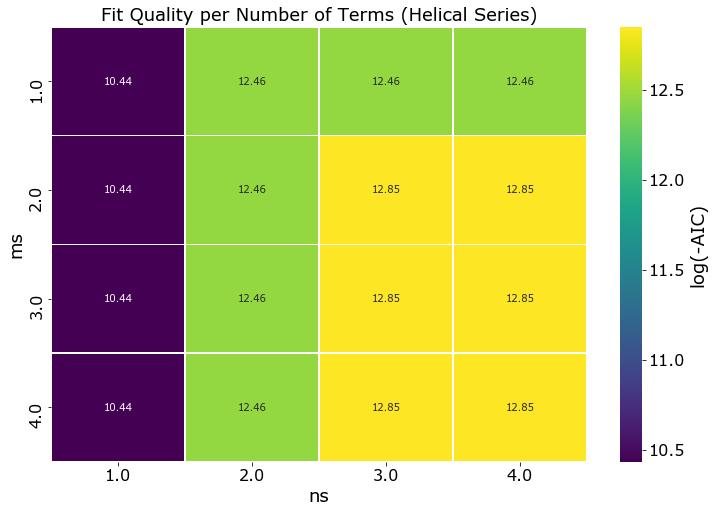

In [11]:
sns.heatmap(df_aic.query('ns>0 and ms>0').pivot('ms', 'ns', 'AIC'), annot=True, fmt='.2f', linewidths=.5, cmap='viridis',
           cbar_kws={'label': 'log(-AIC)'})
plt.title('Fit Quality per Number of Terms (Helical Series)')
#plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/aic_solA_helix.pdf')

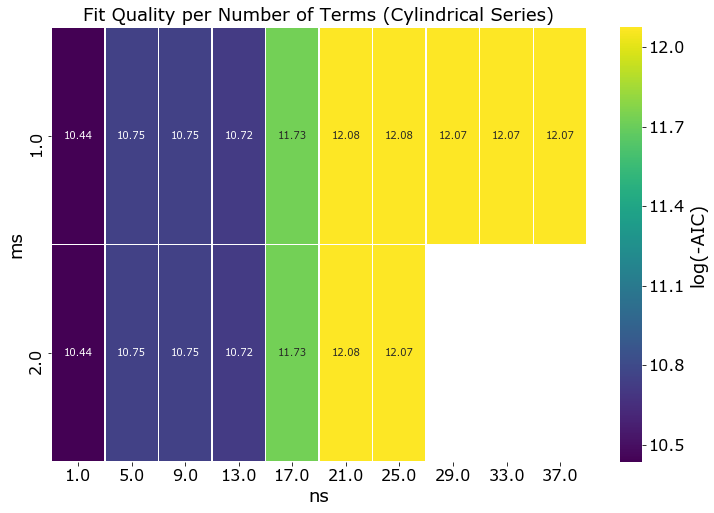

In [46]:
sns.heatmap(df_aic_cyl.query('ns>0').pivot('ms', 'ns', 'AIC'), annot=True, fmt='.2f', linewidths=.5, cmap='viridis',
           cbar_kws={'label': 'log(-AIC)'})
plt.title('Fit Quality per Number of Terms (Cylindrical Series)')
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/aic_solA_cyl.pdf')

# Fit Plots

## Helical Fits

In [47]:
cfg_pickle_Hel = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solA_fit_val', save_name='solA_fit_val', recreate=False)
cfg_params_Hel  = cfg_params(pitch1=0.1, ms_h1=2, ns_h1=3,
                                 pitch2=0, ms_h2=0, ns_h2=0,
                                 length1=0, ms_c1=0, ns_c1=0,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 ks_dict={'k3': 768},
                                 bs_tuples=((0.25, 0, -46),
                                            (0.25, 0, 46)),
                                 bs_bounds=(0.1, 0.1, 4),
                                 version=1000)
_, ff_hel = field_map_analysis('fma_fit_solA', cfg_data_Cole_250mm_long_cyl,
                                  cfg_geom_Cole_250mm_cyl, cfg_params_Hel,
                                  cfg_pickle_Hel, cfg_plot_none)

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=2, ns_h1=3, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -46), (0.25, 0, 46)), bs_bounds=(0.1, 0.1, 4), version=1000)
Elapsed time was 7.78496 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 196
    # data points      = 17280
    # variables        = 25
    chi-square         = 0.00001
    reduced chi-square = 0.00000
    Akaike info crit   = -379326.00144
    Bayesian info crit = -379132.06882
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     2 (fixed)
    ns_h1:     3 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0 (fixed)
    ms_c1:     0 (fixed)
    ns_c1:     0 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:  -5.1220e-12 +/- 0        (0.00%) (init=-1

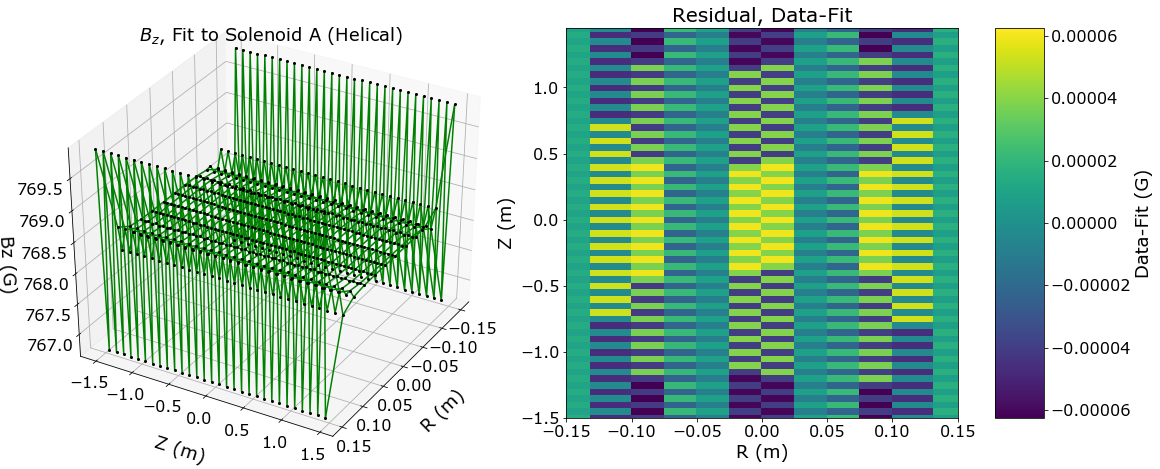

In [60]:
phi=0
fig = mu2e_plot3d(ff_hel.input_data, 'R', 'Z', 'Bz', f'R<=0.15 and Phi=={phi} and -2<Z<2',
            title_simp = r'$B_{z}$, Fit to Solenoid A (Helical)', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/hel_bz_A_fit.png', bbox_inches='tight' )

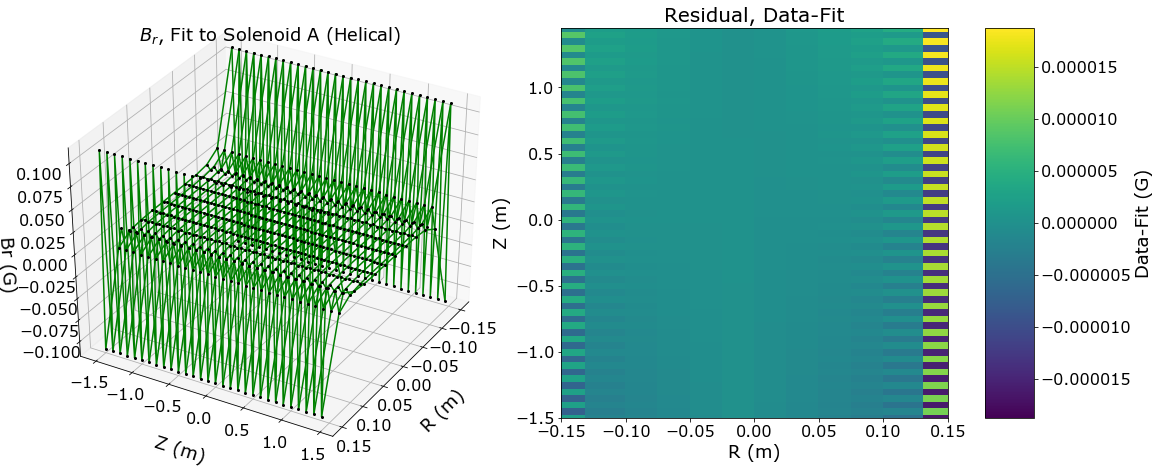

In [61]:
phi=0
fig = mu2e_plot3d(ff_hel.input_data, 'R', 'Z', 'Br', f'R<=0.15 and Phi=={phi} and -2<Z<2',
            title_simp = r'$B_{r}$, Fit to Solenoid A (Helical)', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/hel_br_A_fit.png', bbox_inches='tight')

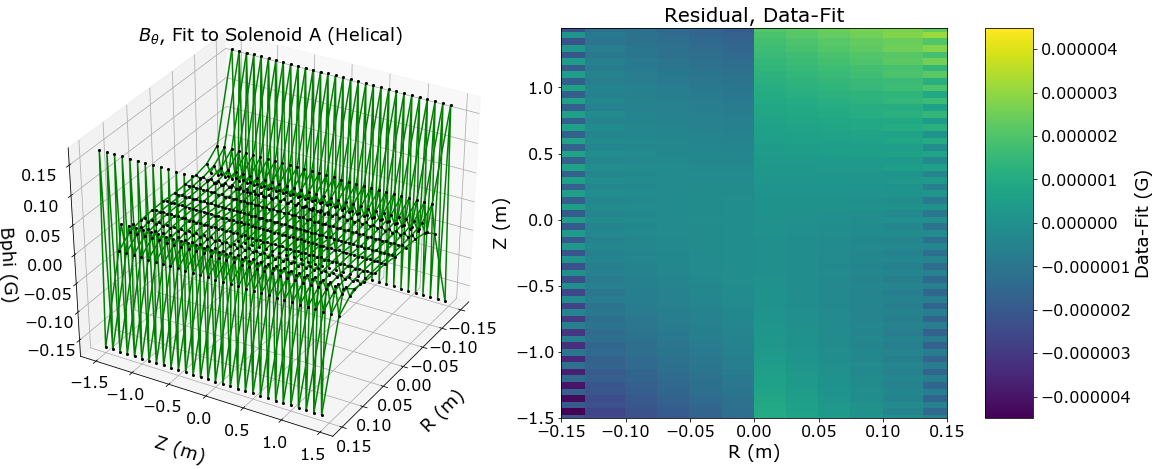

In [62]:
phi=0
fig = mu2e_plot3d(ff_hel.input_data, 'R', 'Z', 'Bphi', f'R<=0.15 and Phi=={phi} and -2<Z<2',
            title_simp = r'$B_{\theta}$, Fit to Solenoid A (Helical)', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/hel_bt_A_fit.png', bbox_inches='tight')

## Cylindrical Fits

In [51]:
cfg_pickle_Cyl = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solA_fit2_val', save_name='solA_fit2_val', recreate=False)
cfg_params_Cyl  = cfg_params(pitch1=0, ms_h1=0, ns_h1=0,
                                 pitch2=0, ms_h2=0, ns_h2=0,
                                 length1=0.05, ms_c1=1, ns_c1=21,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 ks_dict={'k3': 768},
                                 bs_tuples=((0.25, 0, -46),
                                            (0.25, 0, 46)),
                                 bs_bounds=(1e-3, 1e-3, 3),
                                 version=1000)
_, ff_cyl = field_map_analysis('fma_fit2_solA', cfg_data_Cole_250mm_long_cyl,
                                  cfg_geom_Cole_250mm_cyl, cfg_params_Cyl,
                                  cfg_pickle_Cyl, cfg_plot_none)

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=1, ns_c1=21, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -46), (0.25, 0, 46)), bs_bounds=(0.001, 0.001, 3), version=1000)
Elapsed time was 99.3465 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5409
    # data points      = 17280
    # variables        = 76
    chi-square         = 0.66703
    reduced chi-square = 0.00004
    Akaike info crit   = -175451.14438
    Bayesian info crit = -174861.58919
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      1 (fixed)
    ns_c1:      21 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0          +/- 0        (nan%) (init= 0)
    Bc1_0_0:    0          

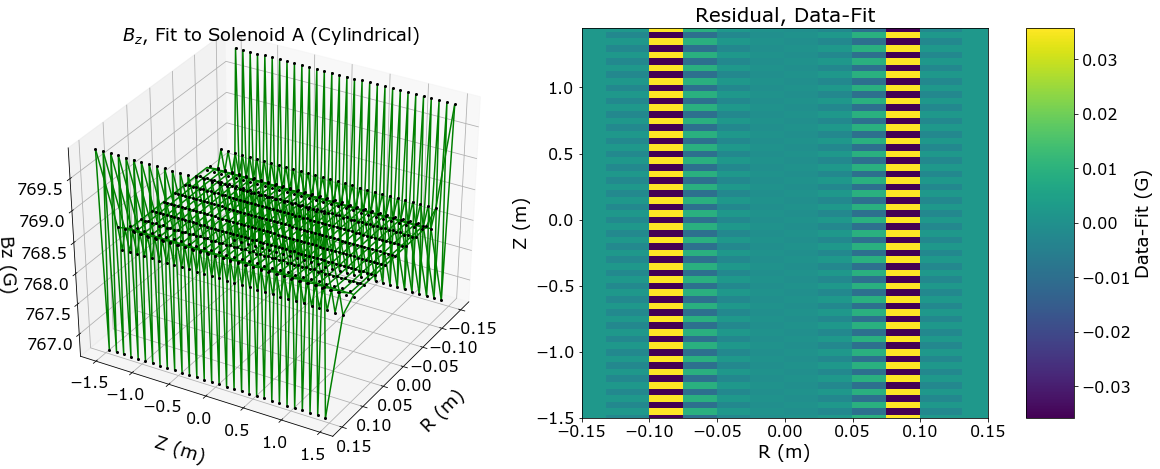

In [63]:
phi=0
fig = mu2e_plot3d(ff_cyl.input_data, 'R', 'Z', 'Bz', f'R<=0.15 and Phi=={phi} and -2<Z<2',
            title_simp = r'$B_{z}$, Fit to Solenoid A (Cylindrical)', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/cyl_bz_A_fit.png', bbox_inches='tight')

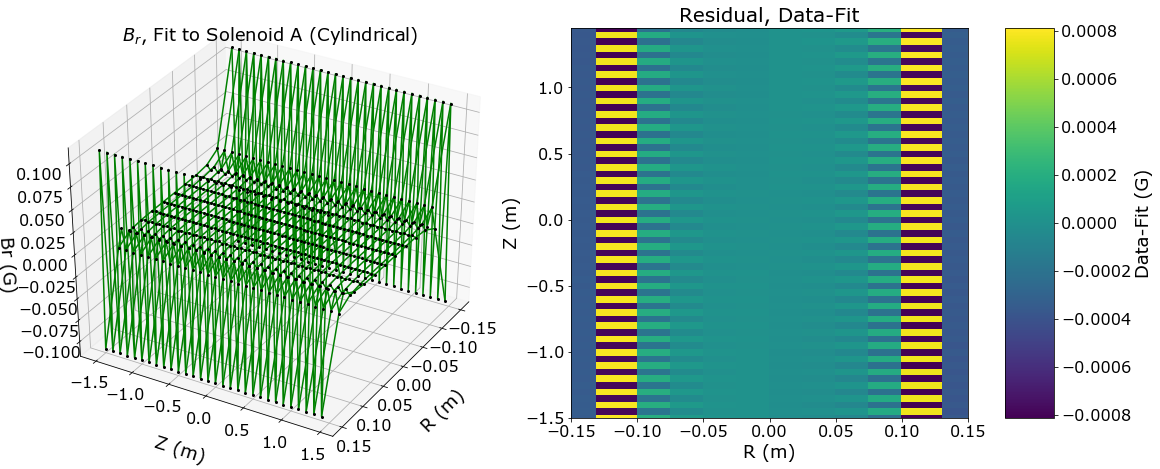

In [64]:
phi=0
fig = mu2e_plot3d(ff_cyl.input_data, 'R', 'Z', 'Br', f'R<=0.15 and Phi=={phi} and -2<Z<2',
            title_simp = r'$B_{r}$, Fit to Solenoid A (Cylindrical)', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/cyl_br_A_fit.png', bbox_inches='tight')

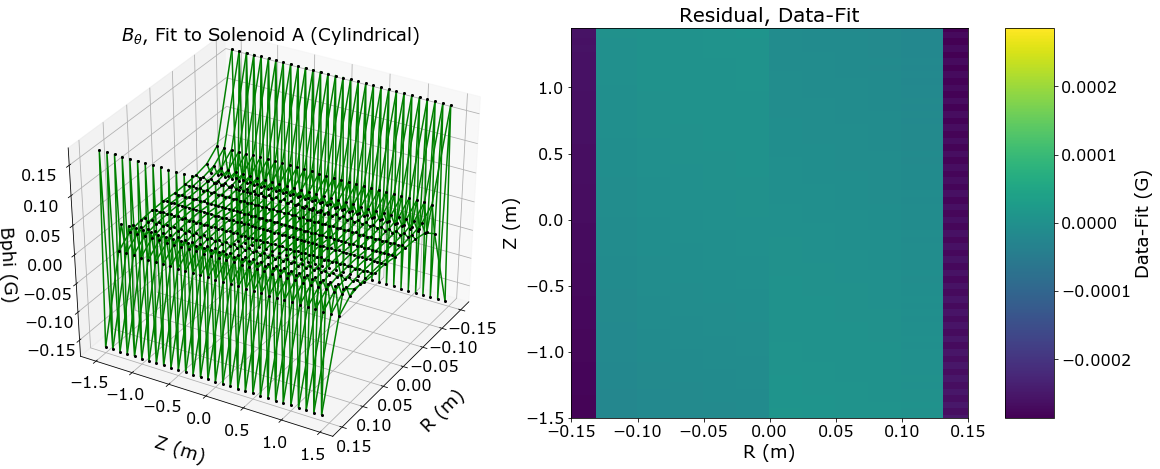

In [65]:
phi=0
fig = mu2e_plot3d(ff_cyl.input_data, 'R', 'Z', 'Bphi', f'R<=0.15 and Phi=={phi} and -2<Z<2',
            title_simp = r'$B_{\theta}$, Fit to Solenoid A (Cylindrical)', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/cyl_bt_A_fit.png', bbox_inches='tight')

# Validation

## Helical Validation

In [55]:
cfg_pickle_Hel_fs = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solA_fit_val', save_name='solA_fit_val', recreate=True)
_, ff_fullsim = field_map_analysis('fma_fit_solA_val', cfg_data_Cole_250mm_long_cyl_hg,
                                  cfg_geom_Cole_250mm_cyl_hg, cfg_params_Hel,
                                  cfg_pickle_Hel_fs, cfg_plot_none)
df_fs_hel =ff_fullsim.input_data

recreating fit with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=2, ns_h1=3, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -46), (0.25, 0, 46)), bs_bounds=(0.1, 0.1, 4), version=1000)
Elapsed time was 7.89323 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2
    # data points      = 1088640
    # variables        = 0
    chi-square         = 0.00041
    reduced chi-square = 0.00000
    Akaike info crit   = -23635702.27995
    Bayesian info crit = -23635702.27995
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     2 (fixed)
    ns_h1:     3 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0 (fixed)
    ms_c1:     0 (fixed)
    ns_c1:     0 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:  -5.122011e-12 (fixed)
    Dh1_0

In [56]:
cfg_pickle_Cyl_fs = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solA_fit2_val', save_name='solA_fit2_val', recreate=True)
_, ff_fullsim = field_map_analysis('fma_fit2_solA_val', cfg_data_Cole_250mm_long_cyl_hg,
                                  cfg_geom_Cole_250mm_cyl_hg, cfg_params_Cyl,
                                  cfg_pickle_Cyl_fs, cfg_plot_none)
df_fs_cyl =ff_fullsim.input_data

recreating fit with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=1, ns_c1=21, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -46), (0.25, 0, 46)), bs_bounds=(0.001, 0.001, 3), version=1000)
Elapsed time was 9.55728 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2
    # data points      = 1088640
    # variables        = 0
    chi-square         = 212473702.41125
    reduced chi-square = 195.17352
    Akaike info crit   = 5741366.53899
    Bayesian info crit = 5741366.53899
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      1 (fixed)
    ns_c1:      21 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0 (fixed)
    Bc1_0_0:    0 (fixed)
    Dc1_0:      1

# Residuals

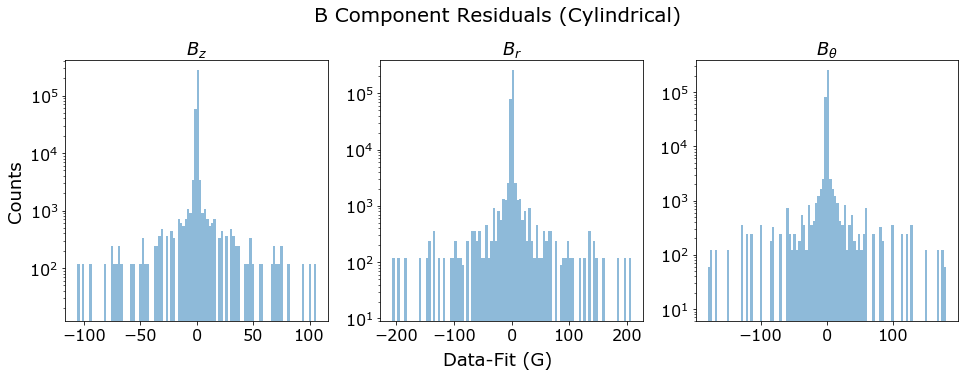

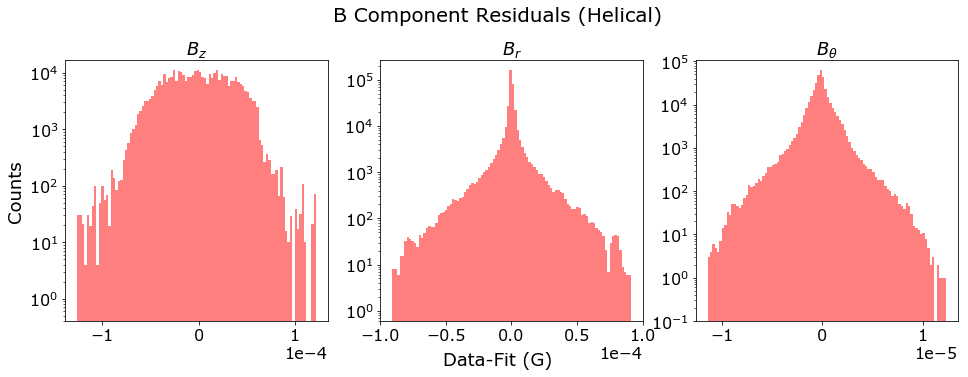

In [58]:
fig = plt.figure(figsize=plt.figaspect(0.3))
fig.text(0.5,0.01, "Data-Fit (G)", ha="center", va="center", fontsize=18)
ax = fig.add_subplot(1, 3, 1)
_ = splt.hist((df_fs_cyl.Bz-df_fs_cyl.Bz_fit), ax=ax, bins=100, log=True)
ax.set_title(r'$B_z$')
ax.set_ylabel('Counts')
ax = fig.add_subplot(1, 3, 2)
_ = splt.hist((df_fs_cyl.Br-df_fs_cyl.Br_fit), ax=ax, bins=100, log=True)
ax.set_title(r'$B_r$')
ax = fig.add_subplot(1, 3, 3)
_ = splt.hist((df_fs_cyl.Bphi-df_fs_cyl.Bphi_fit), ax=ax, bins=100, log=True)
ax.set_title(r'$B_{\theta}$')
fig.suptitle('B Component Residuals (Cylindrical)', verticalalignment='bottom')
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/res_solA_cyl.pdf', bbox_inches='tight')

fig = plt.figure(figsize=plt.figaspect(0.3), constrained_layout=False)
fig.text(0.5,0.01, "Data-Fit (G)", ha="center", va="center", fontsize=18)
ax = fig.add_subplot(1, 3, 1)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useOffset=False)
_ = splt.hist((df_fs_hel.Bz-df_fs_hel.Bz_fit), ax=ax, bins=100, log=True, color='r')
ax.set_title(r'$B_z$')
ax.set_ylabel('Counts')
ax = fig.add_subplot(1, 3, 2)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
_ = splt.hist((df_fs_hel.Br-df_fs_hel.Br_fit), ax=ax, bins=100, log=True, color='r')
ax.set_title(r'$B_r$')
ax = fig.add_subplot(1, 3, 3)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
_ = splt.hist((df_fs_hel.Bphi-df_fs_hel.Bphi_fit), ax=ax, bins=100, log=True, color='r')
ax.set_title(r'$B_{\theta}$')
fig.suptitle('B Component Residuals (Helical)', verticalalignment='bottom')
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/res_solA_hel.pdf', bbox_inches='tight')